# Grabar, cargar y exportar modelos en Keras

## Tarea 1: Importamos librerías

In [ ]:
import tensorflow as tf
import numpy as np
import os

print('This notebook works with TensorFlow version:', tf.__version__)

# usaremos estas carpetas, pero tenemos que tener en cuenta que se borran al terminar la sesión
folders = ['tmp', 'models', 'model_name', 'weights']
for folder in folders:
    if not os.path.isdir(folder):
        os.mkdir(folder)

print(os.listdir('.'))

This notebook works with TensorFlow version: 2.4.1
['.config', 'models', 'tmp', 'weights', 'model_name', 'sample_data']


## Tarea 2: Creamos el modelo

Uno muy sencillo, estilo perceptrón

In [ ]:
# MLP sencillo de tres capas
# una capa entrada con imágenes de 28x28
# capa oculta sin entrada  
# salida, distribución de probabilidad sobre las 10 clases de la salida

def create_cmodel():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  
      tf.keras.layers.Dense(128, activation='relu'),     
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [ ]:
  model = create_cmodel()
  model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


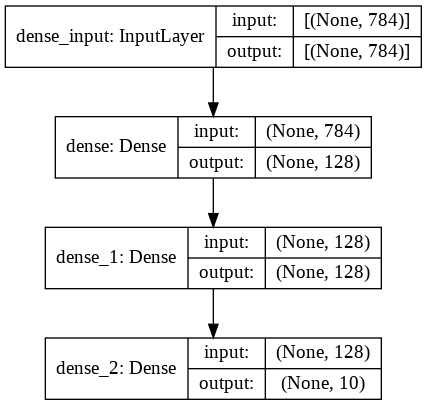

In [ ]:
# me gusta la opción del plot de la red

from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True) 

## Tarea 3: Procesamiento de datos

vamos a utilizar el ejemplo clásico de los datos de moda

In [ ]:
# basicamente ajustar según tipos de datos
# función básica de ayuda para cargar los datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.

# necesitamos codificar las etiquetas
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


4423680/4422102 [==============================] - 0s 0us/step


## Tarea 4: Checkpoint (guardar) del modelo durante el entrenamiento

Práctico para dejarlo... y continuar estudiando Machine learning ;-)

**callbacks.ModelCheckpoint**

In [ ]:
# es muy util porque en muchas ocasiones queremos guardar el modelo 
# (todos los pesos) en los mejores casos de entrenamiento

checkpoint_dir = 'weights/'

_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2, batch_size=512,
    # callbacks nos permite hacer puntos de chequeo durante el entrenamiento
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            os.path.join(checkpoint_dir, 'epoch_{epoch:02d}_acc_{val_acc:.4f}'),
            monitor='val_acc', save_weights_only=True, save_best_only=True
        )
    ]
)

Epoch 1/2
118/118 [==============================] - 2s 14ms/step - loss: 1.0547 - acc: 0.6578 - val_loss: 0.5024 - val_acc: 0.8231
Epoch 2/2
118/118 [==============================] - 1s 10ms/step - loss: 0.4521 - acc: 0.8433 - val_loss: 0.4368 - val_acc: 0.8475


In [ ]:
checkpoint_dir

'weights/'

In [ ]:
# podemos ver incluso que se guardan los ficheros con los nombres de los valores de la precisión, para rápidamente encontrar los ficheros
#os.listdir(checkpoint_dir)
# es equivalente a os.listdir('models') o el directorio donde esté
os.listdir('weights/')


['epoch_01_acc_0.8231.data-00000-of-00001',
 'epoch_01_acc_0.8231.index',
 'checkpoint',
 'epoch_02_acc_0.8475.index',
 'epoch_02_acc_0.8475.data-00000-of-00001']

In [ ]:
os.listdir('tmp')

[]

## Task 5: Load Weights

In [ ]:
# una prueba cuando nuestro modelo no está cargado, que debe de ser mala
model = create_cmodel()

# Recordemos que evaluate devuelve loss y accuracy
print(model.evaluate(x_test, y_test, verbose=False))

[2.442344903945923, 0.03759999945759773]


In [ ]:
# cargamos el modelo grabado
# recordamos, guardamos normalmente los pesos que es lo pesado y que tarda en generarse
# el resto, la arquitectura con tenerla definida en el código es suficiente
# hacer un dir para ver el nombre del fichero guardado, justo antes de la tarea 5, se carga el fichero index
model.load_weights('weights/epoch_02_acc_0.8475') # cuidado, no hay que poner la extensión o da error
print(model.evaluate(x_test, y_test, verbose=False))

# tenemos que ver que sale lo mismo que cuando lo entrenamos y grabamos

[0.43681615591049194, 0.8475000262260437]


Aquí lo tenemos:
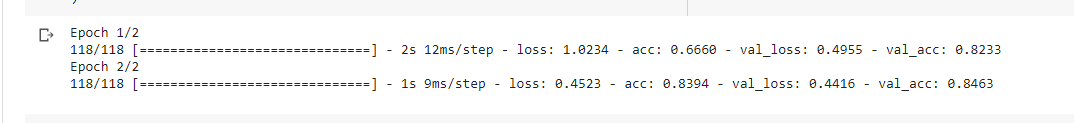

## Task 6: Saving Complete Model During Training

In [ ]:
# copiamos lo mismo de arriba pero con pequeños cambios, models

checkpoint_dir = 'models/'

model = create_cmodel()

_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2, batch_size=512,     # normalmente pondremos más épocas
    # callbacks nos permite hacer puntos de chequeo durante el entrenamiento
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            os.path.join(checkpoint_dir, 'epoch_{epoch:02d}_acc_{val_acc:.4f}.h5'), # ponemos nuevo formato
            monitor='val_acc', save_weights_only=False, save_best_only=False
        )
    ]
)

Epoch 1/2
118/118 [==============================] - 2s 12ms/step - loss: 1.0180 - acc: 0.6648 - val_loss: 0.5032 - val_acc: 0.8242
Epoch 2/2
118/118 [==============================] - 1s 10ms/step - loss: 0.4471 - acc: 0.8447 - val_loss: 0.4563 - val_acc: 0.8356


In [ ]:
ls

model_name/  model_name1/  model.png  models/  sample_data/  tmp/  weights/


In [ ]:
os.listdir('models')

['epoch_02_acc_0.8217.h5',
 'epoch_02_acc_0.8440.h5',
 'epoch_01_acc_0.8208.h5',
 'epoch_01_acc_0.8354.h5']

## Task 7: Load Models

In [ ]:
# igual que antes, hacemos una prueba sin que nuestro modelo no este cargado
model = create_cmodel()

print(model.evaluate(x_test, y_test, verbose=False))

[2.3429014682769775, 0.1242000013589859]


In [ ]:
# se puede cargar uno cualquiera de los dos modelos
model = tf.keras.models.load_model('models/epoch_01_acc_0.8354.h5')
print(model.evaluate(x_test, y_test, verbose=False))

[0.4817899763584137, 0.8353999853134155]


podemos ver la gran diferencia  con respecto al modelo no cargado (no entrenado)

## Tarea 8: Guardar manualmente pesos y modelos

Es muy directo y sencillo.

Puede ser que en algún momento nos interese hacer esa copia

In [ ]:
# grabamos los pesos
model.save_weights('tmp/manually_saved.w')
os.listdir('tmp')

['manually_saved.w.index',
 'manually_saved.w.data-00000-of-00001',
 'checkpoint']

In [ ]:
# grabamos el modelo completo, arquitectura y pesos
model.save('tmp/manually_saved.h5')
os.listdir('tmp')

['manually_saved.w.index',
 'manually_saved.w.data-00000-of-00001',
 'checkpoint',
 'manually_saved.h5']

## Tarea 9: Exportar y Restaurar formatos grabados

In [ ]:
model.save('model_name')
os.listdir('model_name/')

INFO:tensorflow:Assets written to: model_name/assets


['saved_model.pb', 'assets', 'variables']

In [ ]:
# la extensión .pb es portable file

model = tf.keras.models.load_model('model_name')
print(model.evaluate(x_test, y_test, verbose=False))

[0.4817899763584137, 0.8353999853134155]
